# Relación de tipo aplicación $f:A → B$
---
Un tercer tipo de relación $(x,y)\in f$, y la más importante, es la de aplicación. Estas son diferentes a las relaciones de equivalencia y orden porque no son relaciones pensadas para un conjunto consigo mismo $U^2$ sino entre dos conjuntos diferentes $f ⊂ A \times B$.

Esta relación, mapea $f:A → B$ todos los elementos de $A$ hacia los elementos de $B$ cumpliendo unas condiciones.

> **Nota:** primera abastracción importante $f(x)=y$ realmente significa $(x,y)\in f$. También, un elemento del conjunto de partida es $x\in A ⇔ f^{-1}(y)\in A $ y un elemento del conjunto de llegada $y\in B ⇔ f(x)\in B$

Entonces, no tiene la propiedad reflexiva, simétrica, antisimétrica ni transitiva. Pero, si cumple con la pripiedad de unicidad:

> * **Propiedad de unicidad:** todo elemento del conjunto de partida (dominio) $A$ se relaciona o comparte tupla $(x,y)\in f ⇔ f(x) = \{y\}=y$ con solo un solo elemento de $B$ conjunto de destino (imagen)  i.e. $ ∀x\in A,\; ∃!y\in B | f(x) = \{y\} $. Es decir, todos los elementos del dominio $A$ tienen que relacionarse con un solo elemento de la imagen $B$, no con dos ni con tres ¡solo uno!, y que todos los elementos de $A$ deben estar relacionados con algunos (no necesariamente todos) de $B$.

>> **Nota:** segunda abastracción importante $f(x)=y$ realmente es un predicado de dos argumentos $_x𝓡_{\{y\}}$ que cumple con la propiedad de unicidad. Es decir el perdicado de la aplicación.

> **Función:** esta es solo un subtipo de relacion de aplicación en la cual los elementos de los conjuntos que se quieren relacionar son estrictamente números.

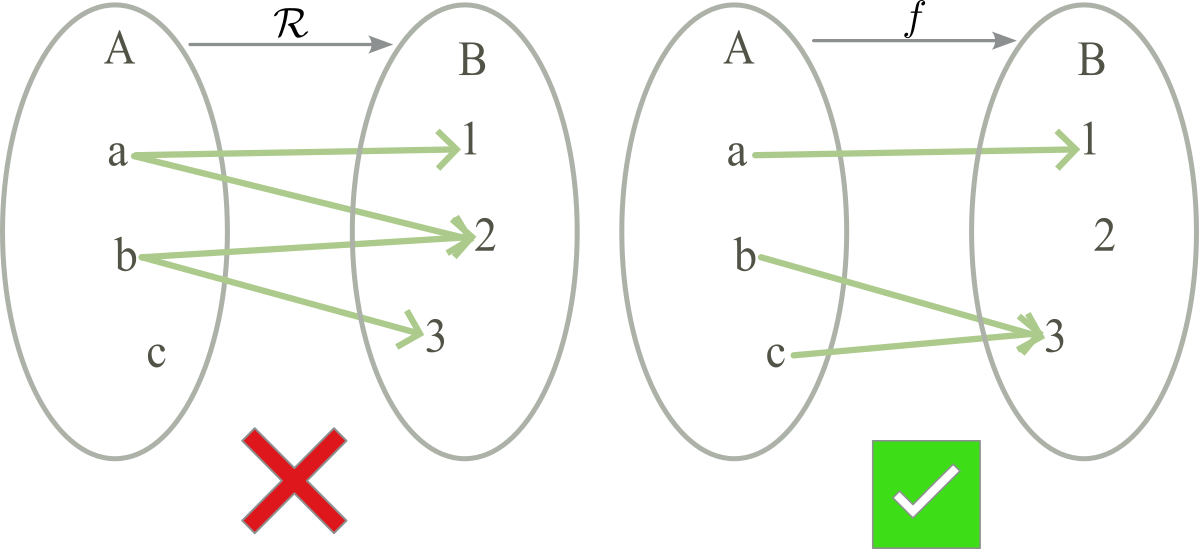

In [3]:
using Plots

# Definirmos el producto: A×B={(x,y)|x∈A,y∈B}
const × = (A, B) -> Set((x, y) for x ∈ A for y ∈ B)

# Definimos representacion matricial de predicado
prod_rep(A, B) = [(a, b) for b in sort(collect(B)), a in sort(collect(A))]

# Definimos propiedad de unicidad
∃!(predicado) = count(predicado) == 1

# Definimos la representacion grafica de una aplicacion
function grafo!(ax, A::Set, B::Set, M::BitMatrix, title::String)
    A = sort(collect(A))
    B = sort(collect(B))
    M_int = Int.(M)

    Plots.heatmap!(
        ax, 1:length(A), 1:length(B), M_int;
        xlabel = "A",
        ylabel = "B",
        title = title,
        aspect_ratio = :equal,
        colorbar = false,
        yflip = true,
        xticks = (1:length(A), string.(A)),
        yticks = (1:length(B), string.(B)),
        c = :viridis,
    )

    for (i, a) in enumerate(A), (j, b) in enumerate(B)
        annotate!(ax, i, j, Plots.text("($a,$b)", 8, :white, halign = :center))
    end
end

# Mapea un elemento en la aplicacion
img(x, 𝘧) = only(Set(
        tup[2] for tup ∈ 𝘧
        if x == tup[1]
        ))

# Definimos la composicion
import Base: ∘
function ∘(𝑔::Set{Tuple{B,C}}, 𝘧::Set{Tuple{A,B}}) where {A,B,C}
    # 𝘧:A→B
    # 𝑔:B→C
    # 𝑔∘𝘧: A→C
    var"𝑔∘𝘧" = Set{Tuple{A,C}}(
        (x, img(img(x,𝘧), 𝑔))
        for (x,_) ∈ 𝘧
        )
    return var"𝑔∘𝘧"
end

# Definimos la composicion
function ∘(𝓢::Set{Tuple{T,T}}, 𝓡::Set{Tuple{T,T}}) where T
    # 𝓢∘𝓡 = {(x, z) ∈ A² ∃y ∈ A | (x, y) ∈ 𝓡 ∧ (y, z) ∈ 𝓢}
    predicado_M = [(x, y) ∈ 𝓡 && (y, z) ∈ 𝓢 for (x,z) ∈ A × A, y ∈ A]
    ∃y = map(any, eachrow(predicado_M))
    return Set{Tuple{T,T}}(collect(A × A)[∃y])
end

∘ (generic function with 5 methods)

In [ ]:
A = Set(['a', 'b', 'c'])
B = Set([1, 2, 3])
A_x_B = A × B

println("Aplicaciones vs. Relaciones")
println("--------------------------")

# 1. definirmos dos realciones en A × B
𝘧 = Set([('a', 1), ('b', 3), ('c', 3)])
𝓡 = Set([('a', 1), ('a', 2), ('b', 2), ('b', 3)])
𝓡_repre(tup, 𝓡) = tup ∈ 𝓡

# 2. Definimos la prueba de si es una relacion tipo aplicacion
# ∀x∈A, ∃!y∈B | f(x)={y}
is_aplication(𝘧) = all([
    ∃!([(x,y) ∈ 𝘧 for y ∈ B])
    for x ∈ A
    ])

println("𝘧⊂A×B: $(𝘧 ⊆ A_x_B)")
println("𝓡⊂A×B: $(𝓡 ⊆ A_x_B)")
println(":: 𝘧 es una aplicacion?: $(is_aplication(𝘧))")
println(":: 𝓡 es una aplicacion?: $(is_aplication(𝓡))")


Aplicaciones vs. Relaciones
--------------------------
𝘧⊂A×B: true
𝓡⊂A×B: true
:: 𝘧 es una aplicacion?: true
:: 𝓡 es una aplicacion?: false


Es evidente que en el grafo de una aplicacion nunca ocurre que en existan dos puntos en la misma columna o lo que es lo mismo:

> *En la **representacion grafica** de una aplicacion si uso una linea vertical siempre debe cortarla en **un solo punto**.*

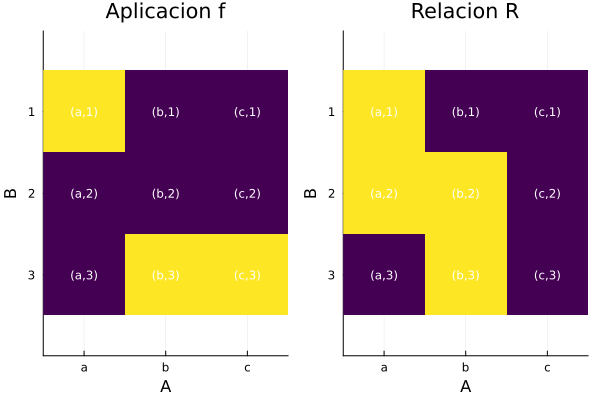

In [ ]:
A_x_B_M = prod_rep(A, B)
# Crear layout y figura
plt = plot(layout = (1, 2))  # dos subplots horizontales

# Grafo de la aplicacion
M = 𝓡_repre.(A_x_B_M, Ref(𝘧))
grafo!(plt[1], A, B, M, "Aplicacion f")  # primer gráfico

# Grafo de la NO aplicacion
M = 𝓡_repre.(A_x_B_M, Ref(𝓡))
grafo!(plt[2], A, B, M, "Relacion R")  # segundo gráfico

display(plt)

## Igualdad y Tipos de aplicaciones
---

Existen varios tipos de aplicaciones:

> * **vacio:** es una aplicación $f: ∅ → A$ cuyo dominio es el conjunto vacio porque i.e. $∀x∈∅,∃!y∈B|f(x)={y} ⇔ \text{true}$ es decir, si preguntamos ¿$∀x∈∅|P$ Todo el vacio cumple la proposición? como el vacio no tiene elementos no hay nada que contradiga la proposición **vacuous truth** `all([])=true`.
 >>Sin embargo, $f: A → ∅$ no puede ser una aplicación ya que $∀x∈A,∃!y∈∅|f(x)={y} ⇔ \text{false}$ nos pone ante un $∃x∈∅|P⇔ \text{false}$ que es siempre falso **vacuous falsehood** `any([])=false`. ya que no existe nada en el vacio que satisfaga la proposición.
 >>
 >> *"Todo es nada: **verdad**. Existe algo en la nada: **falso**"*
> * **Constante:** es una aplicacion $f: A → y$ cuando todos los elementos del dominio $A$ tienen la misma imagen.
> * **Identidad:** cuando la imagen del elemento es el propio elemento $f: A → A$
> * **Sucesión:** cuando el dominio son los números naturales sin incluir el creo y la imagen un conjunto $A$ i.e. $f:\mathbb{N}^* → A$
> * **Característica:** $χ_A: U → \{0,1\}$permite definir con un `bool` si un elemento del universo pertenece o no a un $A⊂U$ i.e. $χ_A(x) = \{ x \in A → 1 \lor x \require{cancel}\cancel{\in} A → 0\}$

**Igualdad de aplicaciones:**

En general dos aplicaciones $f:A →B$ y $g: C → D$ se consideran iguales $f = g$ si y solo si:

> 1. sus dominios $A = C$ son iguales.
> 2. imagenes $B = D$ son iguales.
> 3. predicado $_a𝓡_{\{b\}}=_c𝓡_{\{d\}}$ son iguales. Es decir $f(a)=g(c)$

Lo anterior garantiza que los conjuntos de tuplas $(x,y)\in f$ y $(x,y)\in g$ tengan las mismas tuplas. Es decir $f=g$.

Pero en el caso que $C ⊂ A$ es decir que el dominio de $g: C → D$ sea un subconjunto del dominio de $f:A →B$, por tanto la imagen o codominio tambien seria subconjunto $D ⊂ B$, en estos casos se diria que la aplicación $g$ es **restricción** de $f$ y que $f$ es **extension** de $g$.



Tipos de Aplicaciones
--------------------------
:: vacio 𝘧:∅→A  es una aplicacion?: true
:: vacio 𝘧:A→∅  es una aplicacion?: false
:: constante 𝘧:A→y es una aplicacion?: true
:: identidad 𝘧:A→A es una aplicacion?: true
:: sucession 𝘧:ℕ→A es una aplicacion?: true
:: χ_A es una aplicacion?: true


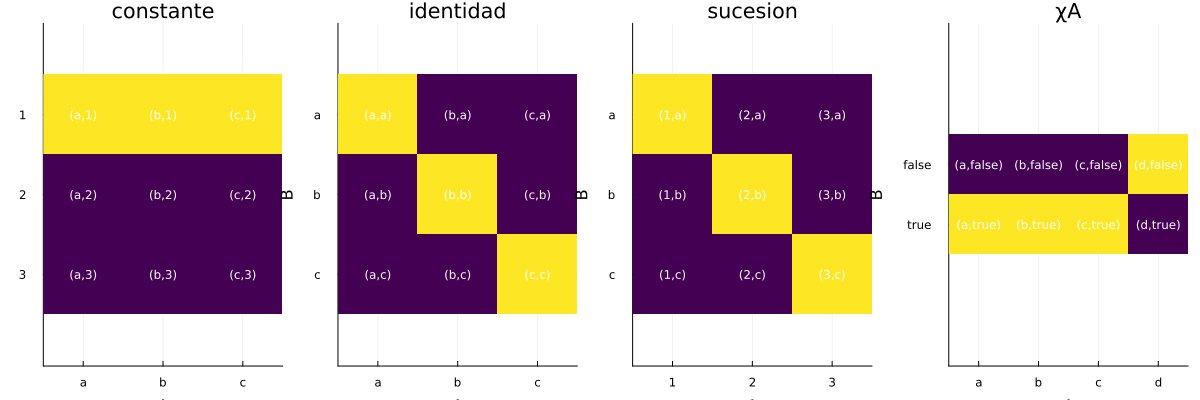

In [ ]:
A = Set(['a', 'b', 'c'])
B = Set([1, 2, 3])
A_x_B = A × B

println("Tipos de Aplicaciones")
println("--------------------------")

# 1. definirmos dos realciones en A × B
𝘧_∅ =  Set{Tuple{Nothing, Char}}() # f:∅→A
𝓡 = Set{Tuple{Char, Nothing}}() # f:A→∅
𝘧_cte = Set([('a', 1), ('b', 1), ('c', 1)]) # f:A→y
𝘧_identidad = Set([('a', 'a'), ('b','b'), ('c', 'c')]) # f:A→A
𝘧_sucession = Set([(1, 'a'), (2,'b'), (3, 'c')]) # f:N∗→A
χ_A = Set([('a', true), ('b',true), ('c', true), ('d', false)]) # χA:U→{0,1}

# 2. Definimos la prueba de si es una relacion tipo aplicacion
# ∀x ∈ dom, ∃!y ∈ img | f(x)={y}
is_aplication(𝘧, dom, img) = all([
    ∃!([(x,y) ∈ 𝘧 for y ∈ img])
    for x ∈ dom
    ])

# 3. Comprobamos y visualizamos las aplicaciones
# Crear layout y figura
plt = plot(layout = (1, 4), size=(1200, 400))  # dos subplots horizontales

# Aplicacion vacia
dom = Set(); img = A
println(":: vacio 𝘧:∅→A  es una aplicacion?: $( is_aplication(𝘧_∅, dom, img) )")
dom = A; img = Set()
println(":: vacio 𝘧:A→∅  es una aplicacion?: $( is_aplication(𝓡, dom, img) )")

# Constante
dom = Set(['a', 'b', 'c']); img = Set(1)
dom_x_img = prod_rep(dom, B)
M_cte = 𝓡_repre.(dom_x_img, Ref(𝘧_cte))
grafo!(plt[1], dom, B, M_cte, "constante")
println(":: constante 𝘧:A→y es una aplicacion?: $( is_aplication(𝘧_cte, dom, img) )")

# Indentidad
dom = Set(['a', 'b', 'c']); img = dom
dom_x_img = prod_rep(dom, img)
M_identidad = 𝓡_repre.(dom_x_img, Ref(𝘧_identidad))
grafo!(plt[2], dom, img, M_identidad, "identidad")
println(":: identidad 𝘧:A→A es una aplicacion?: $(is_aplication(𝘧_identidad, dom, img))")

# Sucession
dom = B; img = A
dom_x_img = prod_rep(dom, img)
M_sucession = 𝓡_repre.(dom_x_img, Ref(𝘧_sucession))
grafo!(plt[3], dom, img, M_sucession, "sucesion")
println(":: sucession 𝘧:ℕ→A es una aplicacion?: $(is_aplication(𝘧_sucession, dom, img))")

# Caracteristica de A
dom = Set(['a', 'b', 'c', 'd']); img = Set([true, false])
dom_x_img = prod_rep(dom, img)
M_χ_A = 𝓡_repre.(dom_x_img, Ref(χ_A))
grafo!(plt[4], dom, img, M_χ_A, "χA")
println(":: χ_A es una aplicacion?: $(is_aplication(χ_A, dom, img))")

display(plt)

## Composición de aplicaciones $g \circ f$
---

Al igual que las relaciones se pueden componer $𝓡 \circ 𝓡$, las realciones de tipo aplicación tambien se pueden componer $g \circ f = g(f(x))$. En este caso, una composición se puede ver como concatenar caminos de un punto a otro e.g. $A\overset{f}{→}B\overset{g}{→}C$ siendo $f$ un camino de $A$ a $B$ y $g$ otro camino de $B$ a $C$ y $g \circ f$ el camino directo $A\overset{g \circ f}{→}C$.

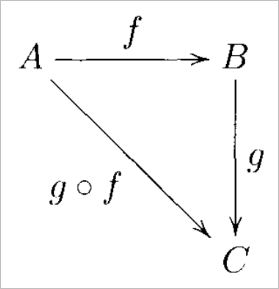

> **No conmutatividad de $\circ$:** la composición no es conmutativa ya que son relaciones que tiene una dirección. Si vemos el diagrama de arriba no es posible $B\overset{g}{→}C$ y despúes de $A\overset{f}{→}B$ por que no habria una continuidad en este camino (una vez estamos en $C$ no podemos saltar a $A$) por esto en este caso $f \circ g = f(g(x))$ no es posible

$$g(f(x)) = g \circ f\neq f \circ g = f(g(x)).$$

Pero, si es asociativa $h \circ (g \circ f) = (h \circ g) \circ f$

> **Elemento neutro $I$:** en este caso sería una aplicación de dos tipos identidad en el dominio $I_A$ o en la imagen $I_B$ i.e.
> |  |  |
> |:---:|:---:|
> | Dom  | $I_A: A → A$  |
> | Img  | $I_B: B → B$  |


Lo interesante es que con esto nace la noción de **composición por derecha o por izquierda**. Si la identidad es de dominio solo puede componer por la derecha $f \circ I_A = f$ pero si es de imagen solo puede componer por izquierda $ I_B \circ f = f $ i.e. $f=A\overset{I_A}{→}A\overset{f}{→}B$
> |  |  |
> |:---:|:---:|
> | Derecha  | $f \circ I_A=A\overset{I_A}{→}A\overset{f}{→}B = f$  |
> | Izquierda  | $I_B \circ f=A\overset{f}{→}B\overset{I_B}{→}B = f$  |


In [ ]:
# 1. Dominios e imagenes
A = Set(1:5)
B = Set('a':'c')
C = Set(['α', 'β', 'γ', 'δ'])

# 2. Relaciones
𝘧 = Set([(1,'a'), (2, 'b'), (3, 'c'), (4, 'a'), (5, 'b')])
I_A = Set([(1,1), (2, 2), (3, 3), (4, 4), (5, 5)])
I_B = Set([('a','a'), ('b', 'b'), ('c', 'c')])
𝑔 = Set([('a','α'), ('b','α'), ('c','γ')])
h = Set([('α', 1), ('β', 3), ('δ', 4), ('γ', 4)])

println("Composicion de Aplicaciones")
println("--------------------------")

println(":: Identidad:")
println("I_A:A→A $(I_A)")
println("I_B:B→B $(I_B)")
println(":: Aplicacion:")
println("𝘧:A→B $(𝘧)")
println("𝑔:B→C $(𝑔)")
println("h:C→D $(h)")

# 3. Definimos la prueba de si es una relacion tipo aplicacion
# ∀x∈A, ∃!y∈B | f(x)={y}
is_aplication(𝘧, dom, img) = all([
    ∃!([(x,y) ∈ 𝘧 for y ∈ img])
    for x ∈ dom
    ])

println(":: 𝘧 es una aplicacion?: $(is_aplication(𝘧, A, B))")
println(":: 𝑔 es una aplicacion?: $(is_aplication(𝑔, B, C))")
println(":: h es una aplicacion?: $(is_aplication(h, C, A))")

println("𝘧 ∘ I_A = f : $(𝘧 ∘ I_A == 𝘧)")
println("I_B ∘ 𝘧 = f : $(I_B ∘ 𝘧 == 𝘧)")
println("h ∘ 𝑔 ∘ 𝘧 = f : $(h ∘ 𝑔 ∘ 𝘧)")



Composicion de Aplicaciones
--------------------------
:: Identidad:
I_A:A→A Set([(5, 5), (1, 1), (3, 3), (2, 2), (4, 4)])
I_B:B→B Set([('c', 'c'), ('b', 'b'), ('a', 'a')])
:: Aplicacion:
𝘧:A→B Set([(4, 'a'), (3, 'c'), (5, 'b'), (2, 'b'), (1, 'a')])
𝑔:B→C Set([('a', 'α'), ('b', 'α'), ('c', 'γ')])
h:C→D Set([('α', 1), ('δ', 4), ('β', 3), ('γ', 4)])
:: 𝘧 es una aplicacion?: true
:: 𝑔 es una aplicacion?: true
:: h es una aplicacion?: true
𝘧 ∘ I_A = f : true
I_B ∘ 𝘧 = f : true
h ∘ 𝑔 ∘ 𝘧 = f : Set([(1, 1), (5, 1), (4, 1), (3, 4), (2, 1)])


## Tipos de aplicaciones: sobreyectiva, inyectiva, biyectiva
---

¿La inversa de de una aplicación $f^{-1}$ es siempre una aplicación? Esta pregunta nos lleva a tener que clasificar las aplicaciones en tres tipos:
> * **Sobreyectiva:** cuando el **dominio $A$ tiene más elementos que la imagen $B$** *"más palomas que nidos"*. En este caso es evidente que todos los elementos de la imagen $y\in B$ estan relacionados con $y\in A$ del dominio y tambien ocurre que algunos $x$ van a tener la misma imagen $f(x)$ *"algunas palomas tendran que compartir nido"* i.e. $∀y\in B, ∃x\in A | f(x)=y$. —Una de las pruebas más conocidas es que cualquier recta horizontal puede cortar la grafica en varios puntos—



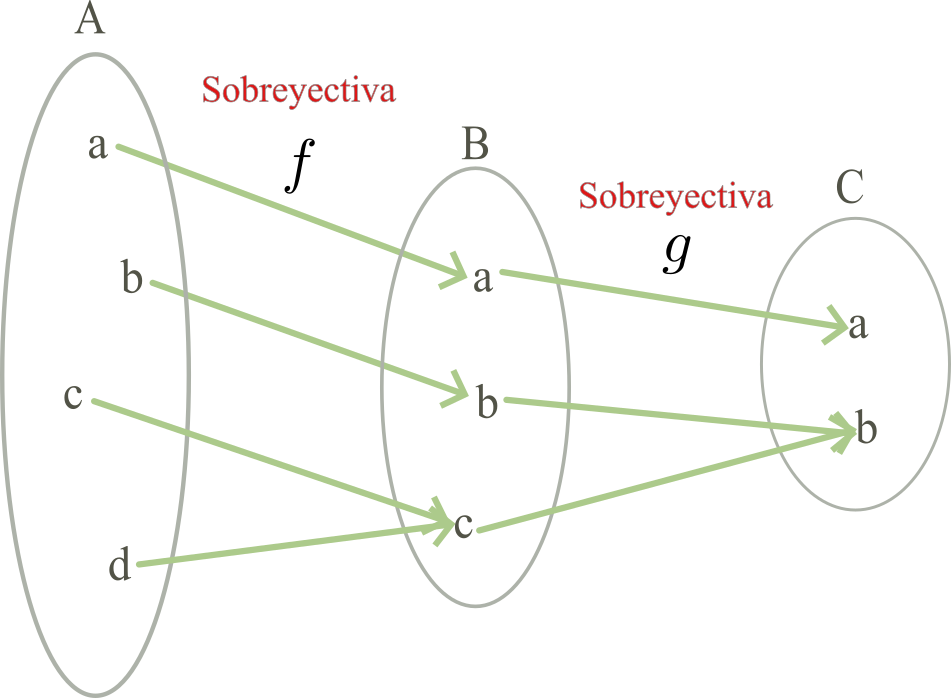

> * **Inyectiva:** cuando el **dominio $A$ tiene menos elementos que la imagen $B$** *"más nidos que palomas"*. En este caso todos los elementos $x\in A$ del dominio estan relacionados con algunos (no todos) $y\in B$ de la imagen y tambien ocurre que algunos $y$ van a quedar fuera de la relación $(x,y)\in f$ *"algunos nidos quedarán vacios"* i.e. $x,x'\in A | f(x)=f(x') ⇒ x= x'$ lo que es igual todos los elementos del dominio tendrán su propia imagen.
—Una de las pruebas más conocidas es que cualquier recta horizontal puede cortar la grafica en un solo punto—



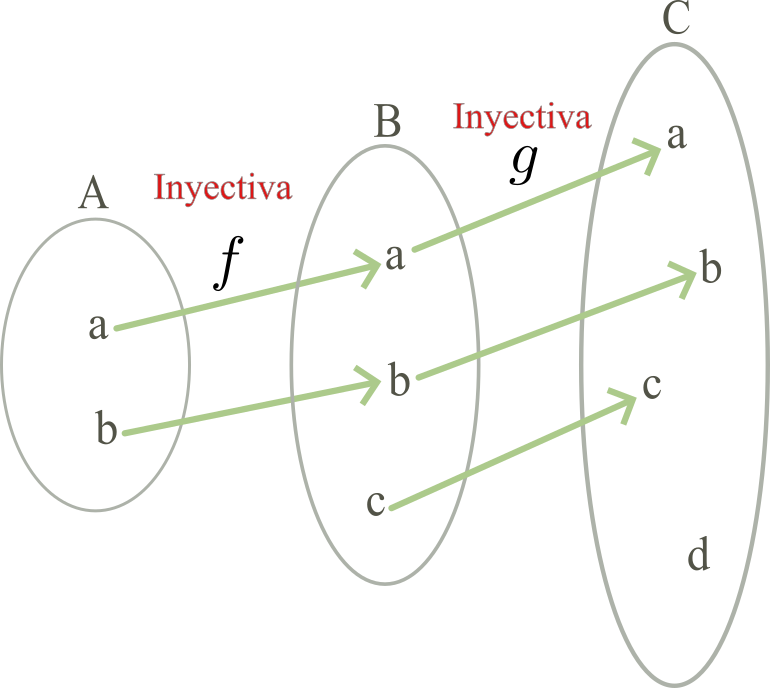

> **Composición —Sobreyectiva o Inyectiva—:** cuando $f:A→B$ y $g:B→C$ son inyectivas (sobreyectivas) entonces la composición $g \circ f: A→B→C$ es inyectiva (sobreyectiva). Lo que quiere decir, es que estos conjuntos $A$, $B$ y $C$ relacionados por inyección (sobreyección) el conjunto A es mas pequeño (grande) que el B y B mas pequeño (grande) que C.  



### Inversa —Sobreyectiva o Inyectiva—:
---

En estos casos (Sobreyectiva o Inyectiva) la inversa $(y,x)\in f^{-1}$ **no es una aplicación**. En el caso de la **sobreyectiva**, si le das la vuelta se viola la unicidad "un nido se comparte con mas de dos palomas"; y en el caso de la **inyectiva**, al darle la vuelta quedarían elementos del dominio sin mapear que tambien viola otra condicion para ser una aplicación "hay nidos vacios".

Si existiera una inversa $f^{-1}$ para $f$ siendo **sobreyectiva** esta solo puede ser una **inversa por derecha** —$f^{-1}$ inyectiva— y por tanto su composición nos retornaria la imagen i.e. $f \circ f^{-1} = I_B$ . En el caso de que $f$ sea **inyectiva** su $f^{-1}$ solo puede ser una **inversa por izquierda** —$f^{-1}$ sobreyectiva— y por tanto su composición nos retornaria el dominio i.e. $f^{-1} \circ f = I_A$





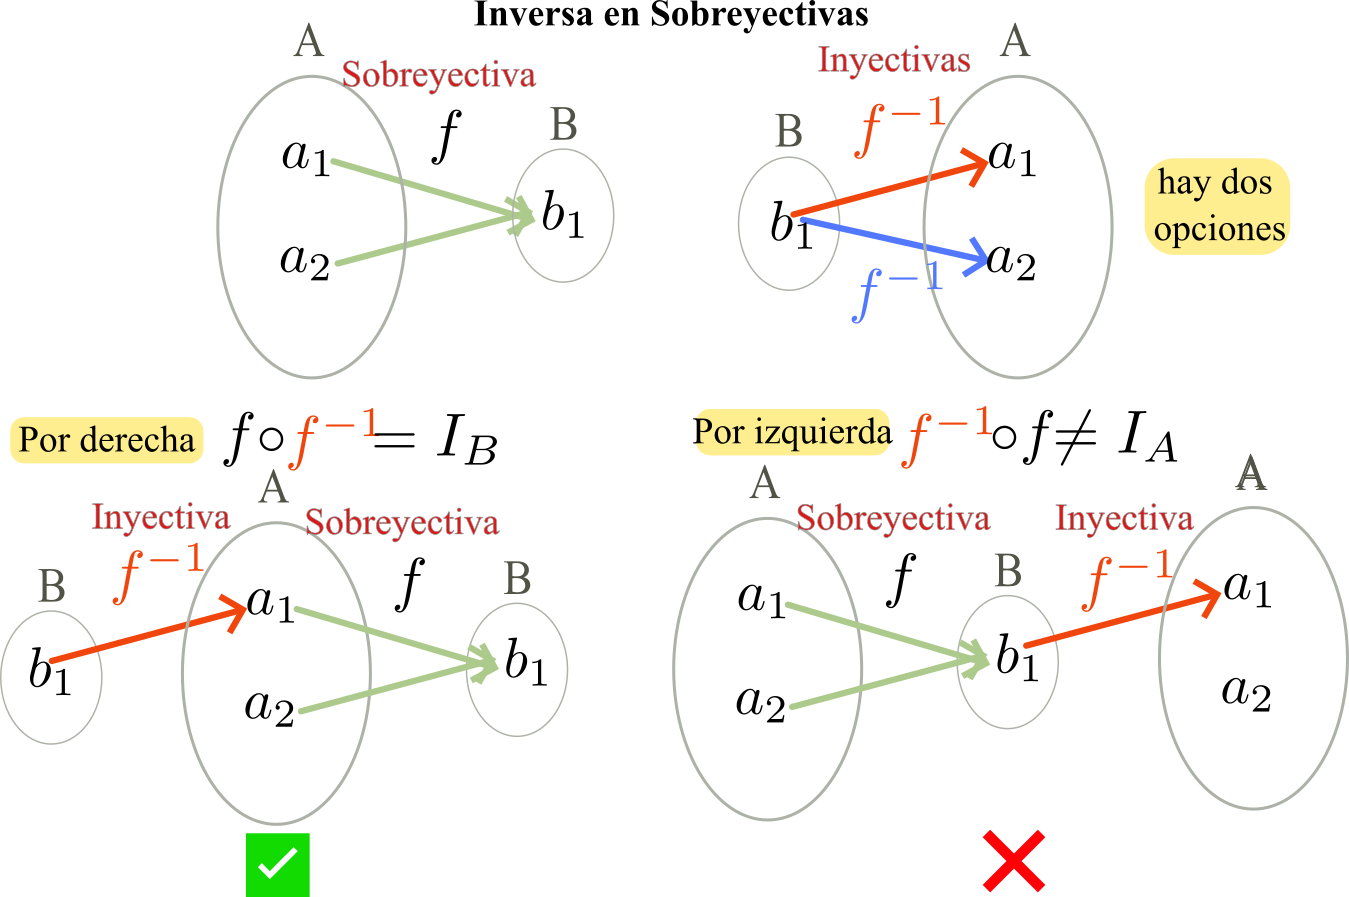

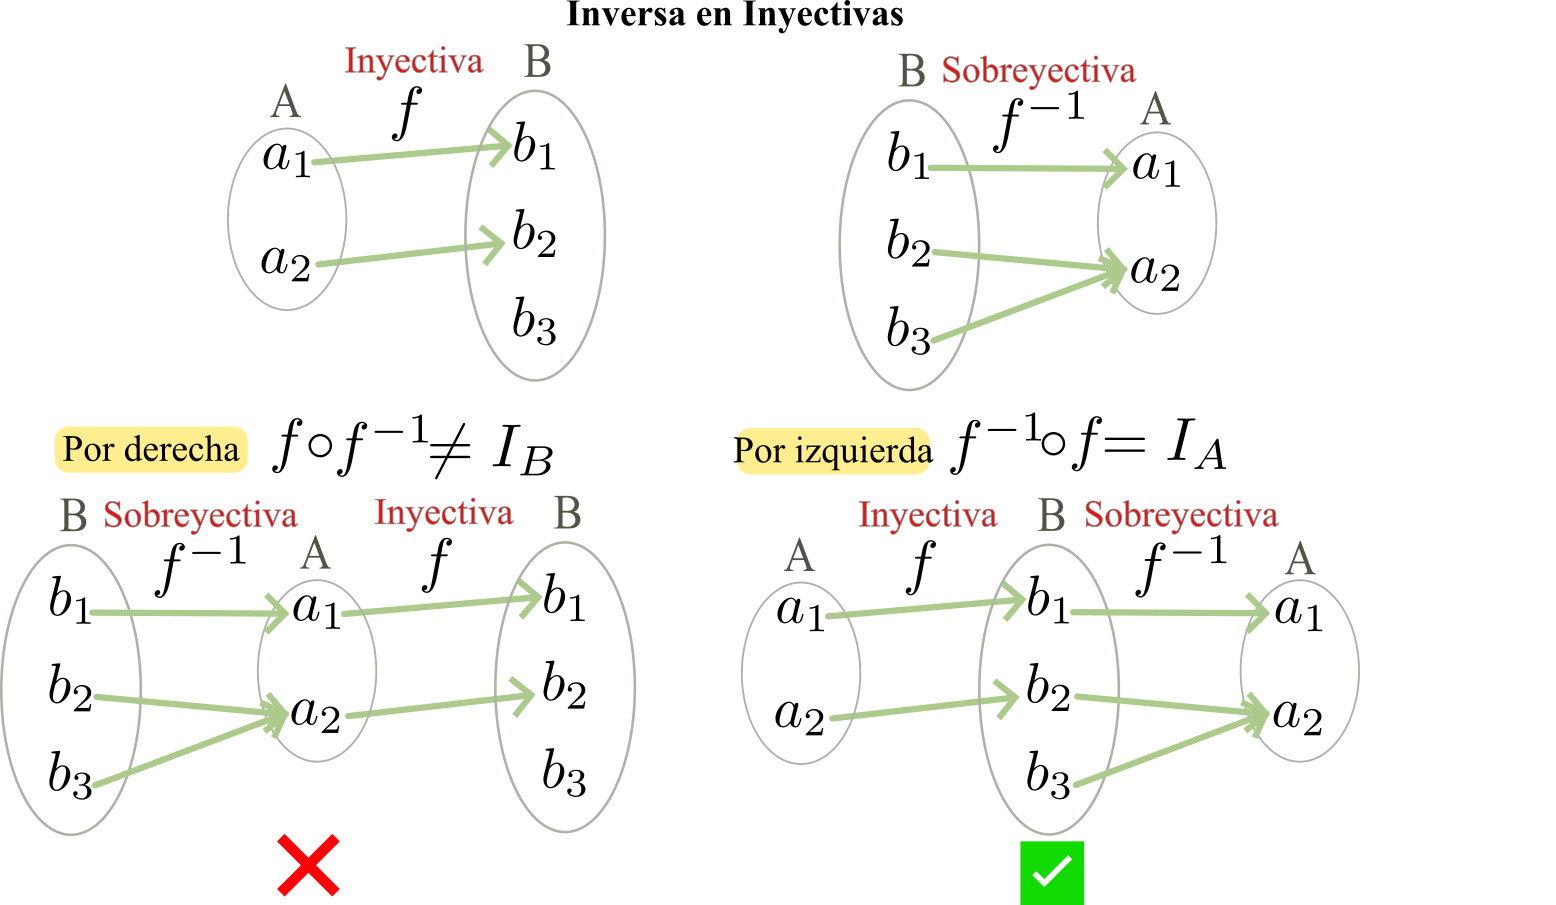

> * **Biyectiva:** cuando el dominio $A$ tiene igual cantidad de elementos que la imagen $B$ *"igual número de palomas y nidos"*. Entonces, todos los elementos $x\in A$ del dominio estan relacionados con todos los $y\in B$ de la imagen. Esto ocurre cuando una aplicación es **sobreyectiva e inyectiva** a la vez.

### Inversa —Biyectiva—:
---

Una aplicación $f: A → B$ es biyectiva si existe una inverza $f^{-1}: B → A$ tal que:

> |  |  |
> |:---:|:---:|
> | Derecha  | $f \circ f^{-1} = I_B$  |
> | Izquierda  | $f^{-1} \circ f = I_A$  |

Por tanto, la inverza $f^{-1}$ de una aplicación biyectiva $f$ es siempre una **aplicación** y a su vez es una inversa que funciona tanto por **derecha** como  por **izquierda**.

También, la composición de dos apliaciones $g \circ f$, ambas biyectivas $f:A→B$ y $g:B→C$, es siempre biyectiva y su inversa es la composición de inverzas con cambio de posición i.e. $(g \circ f)^{-1} = f^{-1} \circ g^{-1}$. Esto tien sentido por que si $g \circ f: A → B → C$ entonces $(g \circ f)^{-1}: A ← B ← C$ por consiguiente $f^{-1} \circ g^{-1}: C → B → A$ que es lo mismo desde el punto de vista de ir de $A$ hasta $C$


In [ ]:
# 1. Dominios e imagenes
A = Set(1:5)
B = Set('a':'c')
C = Set(['α', 'β', 'γ', 'δ'])
D = Set(['🍍', '🍎', '🍓', '🍇'])

# 2. Relaciones
𝘧 = Set([(1,'a'), (2, 'b'), (3, 'c'), (4, 'a'), (5, 'b')])
𝑔 = Set([('a','α'), ('b','β'), ('c','δ')])
h = Set([('α', '🍍'), ('β', '🍎'), ('δ', '🍓'), ('γ', '🍇')])
𝑠 = Set([('a','α'), ('b','α'), ('c','γ')])

# 3. Propiedades sobreyectiva, inyectiva y biyectiva
# ∀y∈B,∃x∈A|f(x)=y propiedad sobreyectiva
is_surjective(𝘧, dom, img) = all([
    any([(x,y) ∈ 𝘧 for x ∈ dom])
    for y ∈ img
    ])

# ∀x,x′∈A|f(x)=f(x′)⇒x=x′ propiedad inyetiva
is_injective(𝘧, dom) = all([
    !( img(x, 𝘧)==img(x′, 𝘧) ) || (x == x′) # f(x)=f(x′) ⇒ x=x′
    for x ∈ dom for x′ ∈ dom
    ])

is_bijective(𝘧, dom, img) = is_surjective(𝘧, dom, img) && is_injective(𝘧, dom)

# 4. Comprobamos si tienen las propiedades
println("𝘧:A → B")
println("---------------")
println(":: A tiene $(length(A)) elementos y B tiene $(length(B)) elementos")
println(":: ¿Es 𝘧 biyectiva?: $(is_bijective(𝘧, A, B))")
println(":: ¿Es 𝘧 sobreyectiva?: $(is_surjective(𝘧, A, B))")
println(":: ¿Es 𝘧 inyectiva?: $(is_injective(𝘧, A))")


println("𝑔:B → C")
println("---------------")
println(":: B tiene $(length(B)) elementos y C tiene $(length(C)) elementos")
println(":: ¿Es 𝑔 biyectiva?: $(is_bijective(𝑔, B, C))")
println(":: ¿Es 𝑔 sobreyectiva?: $(is_surjective(𝑔, B, C))")
println(":: ¿Es 𝑔 inyectiva?: $(is_injective(𝑔, B))")

println("h:C → D")
println("---------------")
println(":: C tiene $(length(C)) elementos y D tiene $(length(D)) elementos")
println(":: ¿Es h biyectiva?: $(is_bijective(h, C, D))")
println(":: ¿Es h sobreyectiva?: $(is_surjective(h, C, D))")
println(":: ¿Es h inyectiva?: $(is_injective(h, C))")

println("𝑠:B → C")
println("---------------")
println(":: B tiene $(length(B)) elementos y C tiene $(length(C)) elementos")
println(":: ¿Es 𝑠 biyectiva?: $(is_bijective(𝑠, B, C))")
println(":: ¿Es 𝑠 sobreyectiva?: $(is_surjective(𝑠, B, C))")
println(":: ¿Es 𝑠 inyectiva?: $(is_injective(𝑠, B))")

𝘧:A → B
---------------
:: A tiene 5 elementos y B tiene 3 elementos
:: ¿Es 𝘧 biyectiva?: false
:: ¿Es 𝘧 sobreyectiva?: true
:: ¿Es 𝘧 inyectiva?: false
𝑔:B → C
---------------
:: B tiene 3 elementos y C tiene 4 elementos
:: ¿Es 𝑔 biyectiva?: false
:: ¿Es 𝑔 sobreyectiva?: false
:: ¿Es 𝑔 inyectiva?: true
h:C → D
---------------
:: C tiene 4 elementos y D tiene 4 elementos
:: ¿Es h biyectiva?: true
:: ¿Es h sobreyectiva?: true
:: ¿Es h inyectiva?: true
𝑠:B → C
---------------
:: B tiene 3 elementos y C tiene 4 elementos
:: ¿Es 𝑠 biyectiva?: false
:: ¿Es 𝑠 sobreyectiva?: false
:: ¿Es 𝑠 inyectiva?: false


In [ ]:
# 5. Comprobamos si 𝘧⁻¹ es aplicación
# ∀x ∈ dom, ∃!y ∈ img | f(x)={y}
is_aplication(𝘧, dom, img) = all([
    ∃!([(x,y) ∈ 𝘧 for y ∈ img])
    for x ∈ dom
    ])
𝘧⁻¹ = Set([('a', 1), ('b', 2), ('c', 3), ('a', 4), ('b', 5)]) # Falla: ∃!y unicidad
𝑔⁻¹ = Set([('α','a'), ('β','b'), ('δ','c')]) # Falla: ∀x ∈ dom
h⁻¹ = Set([('🍍', 'α'), ('🍎', 'β'), ('🍓', 'δ'), ('🍇', 'γ')])
𝑠⁻¹ = Set([('α','a'), ('α','b'), ('γ','c')])
println("¿Inversa de una aplicacion?")
println("---------------")
println("𝘧⁻¹:B → A es aplicación?: $(is_aplication(𝘧⁻¹, B, A))") # 𝘧 sobreyectiva
println("𝑔⁻¹:C → B es aplicación?: $(is_aplication(𝑔⁻¹, C, B))") # 𝑔 inyectiva
println("h⁻¹:D → C es aplicación?: $(is_aplication(h⁻¹, D, C))") # h es biyectiva
println("𝑠⁻¹:C → B es aplicación?: $(is_aplication(𝑠⁻¹, C, B))") # 𝑠 es NO biyectiva

¿Inversa de una aplicacion?
---------------
𝘧⁻¹:B → A es aplicación?: false
𝑔⁻¹:C → B es aplicación?: false
h⁻¹:D → C es aplicación?: true
𝑠⁻¹:C → B es aplicación?: false


In [ ]:
# 6. Definimos las aplicaciones identidad
I_A = Set([(1,1), (2, 2), (3, 3), (4, 4), (5, 5)])
I_B = Set([('a','a'), ('b', 'b'), ('c', 'c')])
I_C = Set([('α', 'α'), ('β', 'β'), ('γ', 'γ'), ('δ', 'δ')])
I_D = Set([('🍍', '🍍'), ('🍎', '🍎'), ('🍓', '🍓'), ('🍇', '🍇')])

# 7. Modificamos las inversas para que sean aplicaciones
𝘧⁻¹ = Set([('a', 1), ('b', 2), ('c', 3)]) # Fix: unicidad
println("𝘧⁻¹:B → A es aplicación?: $(is_aplication(𝘧⁻¹, B, A))") # 𝘧 sobreyectiva
𝑔⁻¹ = Set([('α','a'), ('β','b'), ('δ','c'), ('γ', 'c')]) # Fix: ∀x ∈ dom
println("𝑔⁻¹:C → B es aplicación?: $(is_aplication(𝑔⁻¹, C, B))") # 𝑔 inyectiva

# 8. Comprobamos si cumplen las propiedades
println(":: ¿Es 𝘧⁻¹  inyectiva?: $(is_injective(𝘧⁻¹, B))")
println(":: ¿Es 𝘧⁻¹  sobreyectiva?: $(is_surjective(𝘧⁻¹, B, A))")
println(":: ¿Es 𝑔⁻¹  inyectiva?: $(is_injective(𝑔⁻¹, C))")
println(":: ¿Es 𝑔⁻¹  sobreyectiva?: $(is_surjective(𝑔⁻¹, C, B))")

# 9. Comprobamos si son inversas por derecha o por izquierda
println(":: Inversa por derecha")
println("---------------------------------")
println("𝘧 ∘ 𝘧⁻¹:B → A → B = I_B: $(𝘧 ∘ 𝘧⁻¹ == I_B)") # Inversa por derecha
println("𝘧⁻¹ ∘ 𝘧:A → B → A = I_A: $(𝘧⁻¹ ∘ 𝘧 == I_A)")

println(":: Inversa por izquierda")
println("---------------------------------")
println("𝑔 ∘ 𝑔⁻¹:C → B → C = I_C: $(𝑔 ∘ 𝑔⁻¹ == I_C)")
println("𝑔⁻¹ ∘ 𝑔:B → C → B = I_B: $(𝑔⁻¹ ∘ 𝑔 == I_B)") # Inversa por izquierda

println(":: Inversa: bijectiva")
println("---------------------------------")
println("h ∘ h⁻¹:D → C → D = I_D: $(h ∘ h⁻¹ == I_D)")
println("h⁻¹ ∘ h:C → D → C = I_C: $(h⁻¹ ∘ h == I_C)")

𝘧⁻¹:B → A es aplicación?: true
𝑔⁻¹:C → B es aplicación?: true
:: ¿Es 𝘧⁻¹  inyectiva?: true
:: ¿Es 𝘧⁻¹  sobreyectiva?: false
:: ¿Es 𝑔⁻¹  inyectiva?: false
:: ¿Es 𝑔⁻¹  sobreyectiva?: true
:: Inversa por derecha
---------------------------------
𝘧 ∘ 𝘧⁻¹:B → A → B = I_B: true
𝘧⁻¹ ∘ 𝘧:A → B → A = I_A: false
:: Inversa por izquierda
---------------------------------
𝑔 ∘ 𝑔⁻¹:C → B → C = I_C: false
𝑔⁻¹ ∘ 𝑔:B → C → B = I_B: true
:: Inversa: bijectiva
---------------------------------
h ∘ h⁻¹:D → C → D = I_D: true
h⁻¹ ∘ h:C → D → C = I_C: true


## Factorización canónica
---

> * **Proyección canónica:** una relación de aplicación $f: A  →B$ permite definir una relación de equivalencia $𝓔_f$ en el dominio $A$, y a la vez, una relación de equivalencia $𝓔$ en $A$ permite definir una relación de aplicación $f:A → A/𝓔$ que mapea cada $x \in A$ hacia su conjunto clase respectivo $[x]$. A esta última $p:A → A/𝓔$, se le conoce como la **proyección canónica** de $A$ en $A/𝓔$.

**¿Por qué una aplicación define una equivalencia en su dominio?:** esto ocurre porque una aplicación $f: A  →B$ le asigna a cada elemento del dominio $x \in A$ una imagen $y \in B$, por tanto, si dos elementos $x, x′ \in A$ comparten la misma imagen $f(x) = f(x′)$ serán equivalentes $_x𝓔_{f\;y}$ entre si, por tanto, las clases $[x]$ son conjuntos de elementos $x \in A$ que comparten la misma imagen $f(x) \in B$.Claro que el tipo de aplicación (sobreyectiva, inyectiva, biyectiva) va a determinar como son estas clases.

> **Nota:** esto es evidente, $f(x)=f(x)$ cumple con la p. reflexiva, $f(x)=f(y) ⇒ f(y)=f(x)$ cumple con p. simétrica y $f(x)=f(y) ∧ f(y)=f(z) ⇒ f(x)=f(z)$ cumple con p. transitiva.

**¿Por qué una equivalencia define una aplicación en su dominio?:** esto ocurre porque al definir una relación de equivalencia en $A$ se genera una partición de $A$ formando un conjunto cociente $A/𝓔$ cuyos elementos son conjuntos llamados clases $[x]$ que almacenan elementos $x \in A$ equivalentes entre si, por tanto, es posible mapear cada elemento $x \in A$ a su respectiva clase $[x]$ i.e. $f:A → A/𝓔$. Ya que, muchos elementos $x \in A$ pueden pertenecer a la misma clase $[x]$(hay más clases $[x]$ que elementos $x$) $f:A → A/𝓔$ es sobreyectiva.

> **Nota:** es claro que cumple con la unicidad $∀x∈A,∃!y∈B|f(x)=\{y\}$ ya que a cada elemento del dominio $x∈A$ se corresponde o esta contenido en una única clase $[x]$.
---

Entendiendo lo anterior, ocurre que dependiendo del tipo una aplicación $f: A  →B$ se puedo descomponer en máximo tres aplicacines:

$$f = i \circ b \circ p$$

> * **No biyectivas:** una aplicación $f$ no biyectiva (no sobreyectiva ni injectiva) se puede descomponer o factorizar en 3 factores o aplicaciones.
>> 1. $p$ proyección canónica: $p:A → A/𝓔$ (sobreyectiva)
>> 2. $b$ biyección canónica: $b:A/𝓔 → f(A)$ (biyectiva)
>> 3. $i$ inyección canónica: $i:f(A) → B$ (inyectiva)

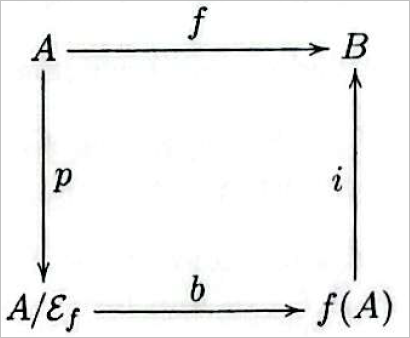

* $p:A→A/𝓔_f$ es **sobreyectiva** ya que varios elementos $x \in A$ pueden pertenecer a la misma clase $[x]$.

* $b:A/𝓔_f→f(A)$ es **biyectiva** ya que las clases son conjuntos que almacenan elementos $x$ que tienen la misma imagen $f(x)$ entonces por cada imagen hay una clase.

* $i:f(A)→B$ es **inyectiva** ya que la imagen no necesariamente es B en general puede ocurrir que la imagen sea solo un subconjunto $f(A)⊂ B$ por tanto $i$ es inyectiva ya que cada imagen tiene su identico en $B$ pero hay elementos de $B$ que quedan fuera de la aplicación.

> * **Inyectivas:** una aplicación $f: A  →B$ inyectiva se puede descomponer o factorizar en 2 factores o aplicaciones:
$$f = i \circ b$$
>> 1. $b$ biyección canónica: $b:A/𝓔 → f(A)$ (biyectiva)
>> 2. $i$ inyección canónica: $i:f(A) → B$ (inyectiva)

> ¿Qué pasó con $p$?: ocurre que $A=A/𝓔$ dado que al ser inyectiva ningún $x \in A$ comparte imagen $f(x)$ entonces la relación de equivalencia es de $x$ consigo mismo porque no comparte imagen con nadie $[x]=\{x\}$. Por tanto, $p$ proyección canónica se vuelve trivial.

> * **Sobreyectiva:** una aplicación $f: A  →B$ sobreyectiva se puede descomponer o factorizar en 2 factores o aplicaciones:
$$f = b \circ p$$
>> 1. $p$ proyección canónica: $p:A → A/𝓔$ (sobreyectiva)
>> 2. $b$ biyección canónica: $b:A/𝓔 → f(A)$ (biyectiva)

> ¿Qué pasó con $i$?: ocurre que $f(A)=B$ dado que al ser sobreyectiva ningún $y \in B$ queda fuera de la relación de aplicación entonces $f(A)$ deja de ser un subconjunto de $B$ para convertirse en el mismo $B$. Por tanto, $i$ se vuelve trivial.

> * **Biyectiva:** una aplicación $f: A  →B$ biyectiva **NO se puede descomponer** o factorizar. Ya que, si es biyectiva es por un lado sobreyectiva i. e. $f(A)=B$ y por otro inyectiva i. e. $A=A/𝓔$ por lo que $p=I_A$, $i= I_B$ y $b:A=A/𝓔→f(A)=B$ entonces $b=f$ esto quiere decir $f=I_B \circ f \circ I_A =f$.


In [ ]:
# Convertir las relaciones a diccionarios
function dic_converter(R::Set{Tuple{x,y}}) where {x, y}
    d = Dict{x, Set{y}}() # Vacio

    for (k,_) ∈ R
        # [x]={y∈U|x𝓔y}
        for v ∈ A
            if (k,v) ∈ R
                push!(
                    get!(d, k, Set{y}()), v
                    ) # Insert new k:v
            end
        end
    end
    return d
end

# ∀y∈B,∃x∈A|f(x)=y propiedad sobreyectiva
is_surjective(𝘧, dom, img) = all([
    any([(x,y) ∈ 𝘧 for x ∈ dom])
    for y ∈ img
    ])

# ∀x,x′∈A|f(x)=f(x′)⇒x=x′ propiedad inyetiva
is_injective(𝘧, dom) = all([
    !( img(x, 𝘧)==img(x′, 𝘧) ) || (x == x′) # f(x)=f(x′) ⇒ x=x′
    for x ∈ dom for x′ ∈ dom
    ])

is_bijective(𝘧, dom, img) = is_surjective(𝘧, dom, img) && is_injective(𝘧, dom)

is_bijective (generic function with 1 method)

In [ ]:
# 1. Dominios e imagenes
A = Set(['α', 'β', 'γ', 'δ'])
B = Set(['🍍', '🍎', '🍓', '🍇'])

# 2. Relaciones
𝘧 = Set([('α', '🍍'), ('β', '🍍'), ('δ', '🍎'), ('γ', '🍇')])

# 3. Comprobamos si tienen las propiedades
println("𝘧:A → B")
println("---------------")
println(":: A tiene $(length(A)) elementos y B tiene $(length(B)) elementos")
println(":: ¿Es 𝘧 biyectiva?: $(is_bijective(𝘧, A, B))")
println(":: ¿Es 𝘧 sobreyectiva?: $(is_surjective(𝘧, A, B))")
println(":: ¿Es 𝘧 inyectiva?: $(is_injective(𝘧, A))")

println("Proyección canónica")
println("-------------------")

# 4. Una aplicacion 𝘧 define una equivalencia 𝓔_f: {x, x′∈ A | f(x)=f(x′)}
𝓔_f = Set((x, x′) for x ∈ A for x′ ∈ A if img(x, 𝘧)==img(x′, 𝘧))
𝓔⁻¹_f = Set((tup[2], tup[1]) for tup ∈ 𝓔_f)
println(":: Aplicacion 𝘧: $(𝘧)")
println(":: Equivalencia x 𝓔_f y ⇔ f(x)=f(y): $(𝓔_f)")

# 5. Comprobamos que cumple con las tres propiedades
es_reflexiva = Set([(a, a) for a ∈ A]) ⊆ 𝓔_f
es_simetrica = 𝓔⁻¹_f ⊆ 𝓔_f
es_transitiva = (𝓔_f ∘ 𝓔_f) ⊆ 𝓔_f
println("¿es reflexiva?: $(es_reflexiva), \n¿es simetrica?:$(es_simetrica), \n¿es transitiva?:$(es_transitiva)")

# 6. Calculamos los conjuntos: Clase de equivalencia
clases = dic_converter(𝓔_f)
println("[x]:")
display(clases)

# 7. Definimos Proyeccion Canonica p:A → A/𝓔
p = Set((x, clases[x]) for x ∈ A)
println(":: proyeccion canonica p:A → A/𝓔")
display(p)
var"A/𝓔" = Set(values(clases))
println(":: ¿Es p sobreyectiva?: $( is_surjective(p, A, var"A/𝓔") )")

println("Factorizacion canónica")
println("-------------------")

# 7. Definimos Biyeccion Canonica b:A/𝓔 → f(A)
b = Set((clases[x], img(x, 𝘧)) for x ∈ A)
println(":: biyeccion canonica b:A/𝓔 → f(A)")
display(b)
var"f(A)" = Set(y for (x,y) ∈ 𝘧)
println(":: ¿Es b biyectiva?: $( is_bijective(b, var"A/𝓔", var"f(A)") )")

# 8. Definimos Inyeccion Canonica i:f(A) → B
i = Set((img(x, 𝘧), img(x, 𝘧)) for x ∈ A if img(x, 𝘧) ∈ B)
println(":: inyeccion canonica i:")
println("f(A) ⊆ B: $(var"f(A)" ⊆ B)")
println("f(A): $(var"f(A)")")
println("B: $(B)")
println(":: i:f(A) → B")
display(i)
println(":: ¿Es i inyectiva?: $( is_injective(i, var"f(A)") )")

# 9. Factorizacion canonica i∘b∘p
println("i∘b∘p = A → A/𝓔 → f(A) → B = 𝘧")
println("i ∘ b ∘ p = 𝘧: $(i ∘ b ∘ p == 𝘧)")

𝘧:A → B
---------------
:: A tiene 4 elementos y B tiene 4 elementos
:: ¿Es 𝘧 biyectiva?: false
:: ¿Es 𝘧 sobreyectiva?: false
:: ¿Es 𝘧 inyectiva?: false
Proyección canónica
-------------------
:: Aplicacion 𝘧: Set([('α', '🍍'), ('γ', '🍇'), ('δ', '🍎'), ('β', '🍍')])
:: Equivalencia x 𝓔_f y ⇔ f(x)=f(y): Set([('β', 'β'), ('β', 'α'), ('δ', 'δ'), ('α', 'β'), ('α', 'α'), ('γ', 'γ')])
¿es reflexiva?: true, 
¿es simetrica?:true, 
¿es transitiva?:true
[x]:


Dict{Char, Set{Char}} with 4 entries:
  'β' => Set(['β', 'α'])
  'δ' => Set(['δ'])
  'α' => Set(['β', 'α'])
  'γ' => Set(['γ'])

:: proyeccion canonica p:A → A/𝓔


Set{Tuple{Char, Set{Char}}} with 4 elements:
  ('α', Set(['β', 'α']))
  ('δ', Set(['δ']))
  ('β', Set(['β', 'α']))
  ('γ', Set(['γ']))

:: ¿Es p sobreyectiva?: true
Factorizacion canónica
-------------------
:: biyeccion canonica b:A/𝓔 → f(A)


Set{Tuple{Set{Char}, Char}} with 3 elements:
  (Set(['δ']), '🍎')
  (Set(['β', 'α']), '🍍')
  (Set(['γ']), '🍇')

:: ¿Es b biyectiva?: true
:: inyeccion canonica i:
f(A) ⊆ B: true
f(A): Set(['🍍', '🍎', '🍇'])
B: Set(['🍍', '🍓', '🍎', '🍇'])
:: i:f(A) → B


Set{Tuple{Char, Char}} with 3 elements:
  ('🍇', '🍇')
  ('🍍', '🍍')
  ('🍎', '🍎')

:: ¿Es i inyectiva?: true
i∘b∘p = A → A/𝓔 → f(A) → B = 𝘧
i ∘ b ∘ p = 𝘧: true


# Equipotencia $≡$
---
Es una **relación de equivalencia** $𝓔$ que funciona en un nivel superior, es decir, define equivalencias entre conjuntos $(A, B) \in ≡$ cuando dichos conjuntos $A$ y $B$ tienen el mismo número de elementos i.e. $|A|=|B|$ y, por tanto, se puede establecer una aplicación biyectiva entre ellos. Es decir, $≡$ es un conjunto de tuplas llamado "equipotencia" donde los elementos dentro de la tupla son conjuntos e. g. $A, B$ que tienen una biyección entre si $f:A →B$.

> **Nota:** $(A, B) \in ≡$ se puede abstraer como $A ≡ B$

Dos conjuntos son equipotentes si:
$$A ≡ B ⇔ ∃f:A →B ∧ f \text{ es biyectiva}$$

> **¿Por qué existe una relación de equivalencia $𝓔$?** resulta que cuando dos conjuntos tienen el mismo número de elementos se genera una aplicación **biyectiva** entre estos $f:A →B$ y dicha aplicación cumple con las tres propiedades:
>
>> 1. **P. Reflexiva:** cumple porque siempre la aplicación identidad $I_A:A →A$ es una apliación biyectiva dado que tiene el mismo número de elementos que si mismo $|A|=|A|$ entonces $A ≡ A$ i. e. $I_A:A →A ∧ I_A \text{ es biyectiva}$ y por tanto $(A,A) ∈ 𝓔$

>> 2. **P. simétrica:** cumple porque si dos conjuntos distintos tienen el mismo número de elementos $|A|=|B|$ entonces existe una aplicación biyectiva $f:A→B$ y su inversa existe como una aplicación que actua por derecha y por izquierda $f^{-1}:B →A$. Entonces, se cumple que $A ≡ B ⇔ ∃f:A →B ∧ f \text{ es biyectiva}$ y a su vez  $B ≡ A ⇔ ∃f^{-1}:B →A ∧ f^{-1} \text{ es biyectiva}$ i.e. $A ≡ B → B ≡ A$ por tanto $(A,B) \in 𝓔 → (B,A) \in 𝓔$

>> 3. **P. transitiva:** cumple porque si existen $f: A →B$ y $g:B →C$ como dos aplicaciones biyectivas dado que el tamaño de los conjuntos es igual $|A|=|B|=|C|$ entonces la composición $g ∘ f: A → B → C$ es siempre biyectiva. Entonces, se cumple que $A ≡ B ⇔ ∃f:A →B ∧ f \text{ es biyectiva}$ y a su vez $B ≡ C ⇔ ∃g:B →C ∧ g \text{ es biyectiva}$ por tanto $A ≡ C ⇔ ∃g ∘ f:A →C ∧ g ∘ f \text{ es biyectiva}$ i. e. $A ≡ B ∧ B ≡ C → A ≡ C$ por tanto $(A,B) \in 𝓔 ∧ (B,C) \in 𝓔 → (A,C) \in 𝓔$

## Cardinal $|A|$ o card(A)
---
Ahora, recordemos que una relación de equivalencia $𝓔$ generaba una partición del universo $U$ conocido como conjunto conciente $U/𝓔$ y esas particiones se conocian como conjuntos $[x] \in U/𝓔$ llamados **clases** que albergaban elementos equivalentes entre si.

Bueno, pues en nuestra relación de equivalencia "equipotencia" también se genera una partición del universo $U/≡$ de todos los conjuntos posibles $U$ y los conjuntos o particiones que en el caso anterior llamamos clases $[x]$ se llaman ahora **cardinales** $\text{card}(A) \in U/≡$. Dichos cardinales $\text{card}(A) = |A|$, son conjuntos que albergan otros conjuntos e.g. $A, B, C$ que son equipotentes entre si i.e.$A ≡ B, B ≡ C, A ≡ C$ o dicho de otra forman, que poseen una biyección entre si i.e. $f:A →B∧g:B →C∧g ∘ f: A → C$ o dicho de otra forma, que tienen el mismo número de elementos o cardinalidad $|A|=|B|=|C|$.

$$A ≡ B, B ≡ C, A ≡ C → \text{card}(A) = |A| = \{A, B, C\}$$

Entonces, cada cardinal es una partición del universo de posibles conjuntos. Es decir, **generamos particiones |A| donde conviven los conjuntos que son del mismo tamaño**. Por tanto, podemos clasificar cualquier conjunto pos su tamaño en clases o cardinales. Lo de "clasificar por su tamaño" conlleva contar el numero de elementos y por tanto el uso de los números naturales $\mathbb{N}$.

Tipos de cardinales:
> * **Cardinal 0:** es el conjunto que contiene al conjunto vacio $\mathbf{0} = \{∅\}$
> * **Cardinal n (conjunto de conjutos finitos):** este puede ser cualquier cardinal finito e.g.$\mathbf{1}, \mathbf{2}, …, \mathbf{n}$. Son los conjuntos o cardinales que son equipotentes con algún subconjunto de los $\mathbb{N}$ e. g. $\{🍍\}≡\{1\}⊂\mathbb{N}$, $\{🍍, 🍎\}≡\{1, 2\}⊂\mathbb{N}$, $…$, $\text{conjuntos de n frutas}≡\{1, 2, \dots, n\}⊂\mathbb{N}$. Es decir usamos a los naturales $\mathbb{N}$ como el estandar de medida y, por tanto, al ver si un conjunto de $n$ cosas es equipotente $≡$ con algun subconjunto de $\mathbb{N}$ esto es lo mismo que contar 🤩. En conjuntos finitos e.g. $A$ con $n$ elementos, el cardinal al que pertencen es practicamente igual a un número natural que representa el número de elementos que tiene dicho conjunto $|A|=\mathbf{n}$.
> * **Cardinal $ℵ_0$ (conjunto de conjuntos infinitos númerables):** el *aleph* es el conjunto o cardinal de todos los conjuntos que son equipotentes con el conjunto $\mathbb{N}$ i.e. $\text{conjuntos de infinitos elementos}≡\mathbb{N}$. Aunque, un conjunto $A$ tenga infinitos elementos ya que es equipotente con los naturales que son infinitos $A ≡ \mathbb{N}$, aún sería númerable $A \in ℵ_0$ ya que podemos contar sus elementos (aunque nunca terminemos de contarlos).
> * **Cardinal $\mathfrak{c}$ (conjunto de conjuntos infinitos NO númerables):** el *continuum* seria el conjunto de conjuntos que contiene a todos aquellos que son equipontentes con los números reales $\mathbb{R}$. Dado que, $\mathbb{R}$ tiene infinitos elementos pero no es posible numerarlos, i.e. si el primer elemento es cero ¿cuál sería el segundo? ¿$0.1$? No, porque antes esta el $0.01$, pero, $0.01$ tampoco sería el segundo elemento porque antes estaría el $0.001$, es decir no podemos establecer un primero y un segundo como si lo hacemos en los naturales. Por tanto, si $A$ es un conjunto equipotente con los reales $A ≡ \mathbb{R}$ entonces pertence al cardinal del *continuum* $A \in \mathfrak{c}$ y por tanto es un conjunto infinito NO númerable.

Por tanto, todas las particiones posibles del universo de todos los conjuntos posibles $U/≡$ serían Card $\mathbf{0}$, Card $\mathbf{1}$, Card $\mathbf{2}$, $…$, Card $\mathbf{n}$, Card $ℵ_0$ y Card $\mathfrak{c}$. Sin embargo, $U/≡$ no puede ser un conjunto que contenga a todos los cardinales porque llegariamos a una contradicción lógica.

In [4]:
using Pkg
Pkg.add("IterTools")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.11/Project.toml`
  [c8e1da08] + IterTools v1.10.0
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [5]:
# ∀x∈A, ∃!y∈B | f(x)={y}
is_aplication(𝘧, dom, img) = all([
    ∃!([(x,y) ∈ 𝘧 for y ∈ img])
    for x ∈ dom
    ])

# ∀y∈B,∃x∈A|f(x)=y propiedad sobreyectiva
is_surjective(𝘧, dom, img) = all([
    any([(x,y) ∈ 𝘧 for x ∈ dom])
    for y ∈ img
    ])

# ∀x,x′∈A|f(x)=f(x′)⇒x=x′ propiedad inyetiva
is_injective(𝘧, dom) = all([
    !( img(x, 𝘧)==img(x′, 𝘧) ) || (x == x′) # f(x)=f(x′) ⇒ x=x′
    for x ∈ dom for x′ ∈ dom
    ])

is_bijective(𝘧, dom, img) = is_surjective(𝘧, dom, img) && is_injective(𝘧, dom)

# Para el caso de equipotencia
function img(x::Set, 𝘧::Set{Tuple{Set, Set}})
    condition(tup) = eltype(x) <: Set ? any(collect(x) .== [tup[1]]) : x == tup[1]
    return Set(
            tup[2] for tup ∈ 𝘧
            if condition(tup)
            )
end

# Composicion de relaciones (NO Aplicaciones)
function ∘(𝑔::Set{Tuple{Set,Set}}, 𝘧::Set{Tuple{Set,Set}})
    # 𝘧:A→B
    # 𝑔:B→C
    # 𝑔∘𝘧: A→C
    composicion = Set()
    for (x,_) ∈ 𝘧
        for (x, y) in zip(ncycle([x], 10), img(img(x,𝘧), 𝑔))
            push!(composicion, (x,y))
        end

    end
    return composicion
end

# Convertir las relaciones a diccionarios
function dic_converter(R::Set{Tuple{x,y}}, U::Set) where {x, y}
    d = Dict{x, Set{y}}() # Vacio

    for (k,_) ∈ R
        # [x]={y∈U|x𝓔y}
        for v ∈ U
            if (k,v) ∈ R
                push!(
                    get!(d, k, Set{y}()), v
                    ) # Insert new k:v
            end
        end
    end
    return d
end

dic_converter (generic function with 1 method)

In [35]:
using IterTools

# 1. Conjuntos de diferentes tamaños
∅ = Set()
A = Set(1:5)
B = Set('a':'c')
C = Set(['α', 'β', 'γ', 'δ'])
D = Set(['🍍', '🍎', '🍓', '🍇'])
Unvierse = Set([∅, A, B, C, D])

# 2. 𝘧: A → B la aplicacion mas simple
∃𝘧(A, B) = Set((a,b) for (a,b) in zip(A, ncycle(B, length(A))))
# (A, B) ∈ ≡ ⇔ ∃𝘧:A→B ∧ f es biyectiva
is_equinumerosity(A, B) = is_aplication(∃𝘧(A, B) , A, B) && is_bijective(∃𝘧(A, B) , A, B)
# Definiendo el conjunto ≡
var"≡" = Set((A,B) for A in Unvierse, B in Unvierse if is_equinumerosity(A,B))
var"≡⁻¹" = Set((tup[2], tup[1]) for tup ∈ collect(var"≡"))
println("≡ conjunto equipotencia:")
display(var"≡")
println(":: A≡B son equipotentes: $((A,B) ∈ var"≡")")
println(":: C≡D son equipotentes: $((C,D) ∈ var"≡")")

# 3. Comprobamos que cumple con las tres propiedades
es_reflexiva = Set([(A, A) for A ∈ Unvierse]) ⊆ var"≡"
es_simetrica = var"≡⁻¹" ⊆ var"≡"
es_transitiva = (var"≡" ∘ var"≡") ⊆ var"≡"

println("¿es reflexiva?: $(es_reflexiva), \n¿es simetrica?:$(es_simetrica), \n¿es transitiva?:$(es_transitiva)")

# 4. Particion de U/≡
clases = dic_converter(var"≡", Unvierse)
println(":: U/≡ conjunto cociente:")
var"U/≡" = Set(values(clases))
display(var"U/≡")
println(":: Clases [x]:")
display(clases)

≡ conjunto equipotencia:


Set{Tuple{Set, Set}} with 7 elements:
  (Set(['a', 'c', 'b']), Set(['a', 'c', 'b']))
  (Set(['🍍', '🍓', '🍎', '🍇']), Set(['🍍', '🍓', '🍎', '🍇']))
  (Set(['🍍', '🍓', '🍎', '🍇']), Set(['β', 'δ', 'α', 'γ']))
  (Set(['β', 'δ', 'α', 'γ']), Set(['🍍', '🍓', '🍎', '🍇']))
  (Set([5, 4, 2, 3, 1]), Set([5, 4, 2, 3, 1]))
  (Set{Any}(), Set{Any}())
  (Set(['β', 'δ', 'α', 'γ']), Set(['β', 'δ', 'α', 'γ']))

:: A≡B son equipotentes: false
:: C≡D son equipotentes: true
¿es reflexiva?: true, 
¿es simetrica?:true, 
¿es transitiva?:true
:: U/≡ conjunto cociente:


Set{Set{Set}} with 4 elements:
  Set(Set[Set(['a', 'c', 'b'])])
  Set(Set[Set{Any}()])
  Set(Set[Set(['β', 'δ', 'α', 'γ']), Set(['🍍', '🍓', '🍎', '🍇'])])
  Set(Set[Set([5, 4, 2, 3, 1])])

:: Clases [x]:


Dict{Set, Set{Set}} with 5 entries:
  Set(['β', 'δ', 'α', 'γ'])     => Set([Set(['β', 'δ', 'α', 'γ']), Set(['🍍', '…
  Set([5, 4, 2, 3, 1])          => Set([Set([5, 4, 2, 3, 1])])
  Set(['a', 'c', 'b'])          => Set([Set(['a', 'c', 'b'])])
  Set(['🍍', '🍓', '🍎', '🍇']) => Set([Set(['β', 'δ', 'α', 'γ']), Set(['🍍', '…
  Set{Any}()                    => Set([Set{Any}()])

In [36]:
# A ≡ N
function cardinality(A::Set)
    N = 1:100 # Naturals
    for n ∈ N
        if is_equinumerosity(collect(A), Set(1:n)) # A ≡ N
            return n
        elseif isempty(A)
            return 0
        end
    end
end

cardinality (generic function with 1 method)

In [37]:
# 5. Renombramos las key como numeros ℕ
cardinales = Dict{Int64, Set}()
for (k, v) in clases
    key = cardinality(k)
    cardinales[key] = v
end
# Note: estos son número cardinales
println(":: Primeros Cardinales:")
cardinales

:: Primeros Cardinales:


Dict{Int64, Set} with 4 entries:
  5 => Set(Set[Set([5, 4, 2, 3, 1])])
  4 => Set(Set[Set(['β', 'δ', 'α', 'γ']), Set(['🍍', '🍓', '🍎', '🍇'])])
  0 => Set(Set[Set{Any}()])
  3 => Set(Set[Set(['a', 'c', 'b'])])

## Conjunto de Aplicaciones $\mathcal{F}(A,B)$
---
En el ejemplo anterior definimos lo siguiente:`∃𝘧(A, B) = Set((a,b) for (a,b) in zip(A, ncycle(B, length(A))))`, como la aplicación biyectiva $f:A → B$ pero no necesariamente es la única biyección posible.

**¿Cuántas aplicaciones son posibles entre A y B?:** primero que todo esto depende del número de elementos o *número cardinal* de $A$ y $B$ i.e. $|A|=n,$ $|B|=m$.

> * $n=m$: entonces existen $n!$ **biyecciones** posibles entre $A$ y $B$ y ademas significaría que son equipotentes $A ≡ B$.+

> * $n \neq m$: no existen biyecciones entre $A$ y $B$ y no serían equipotentes $A\require{cancel}\cancel{≡} B$. Entonces, solo pueden ocurrir dos casos:

>> * $n < m$: existen $\frac{m!}{(m-n)!}$ aplicaciones **inyectivas** sin repeticion, ya que $A$ sería más grande que $B$. No existen sobreyecciones
>> * $n > m$: en este caso $B$ es más grande que $A$ entonces existen $m!\; \mathrm{S}(n,m)$ aplicaciones **sobreyectivas**, siendo $\mathrm{S}(n,m)$ el *número de Stirling de segundo tipo*. No existen inyecciones.

En general, independientemente lo anterior siempre existirán $m^n$ **aplicaciones** posibles entre $A$ y $B$ sean o no biyectivas, inyectivas o sobreyectivas

Por tanto, el conjunto de todas las aplicaciones posibles entre $A$ y $B$ llamado $\mathcal{F}(A,B)= \{f_1, f_2, …, f_{m^n}\}$ contiene siempre $m^n$ aplicaciones.

## Relación de Orden (Cardinales)
---
Existe una **relación de orden ≼** entre cardinales, esto es porque existe una aplicación **inyectiva** entre los conjuntos de $\mathrm{Card}(A)=\{A_1, A_2, \dots, A_n\}$ y de $\mathrm{Card}(B)=\{B_1, B_2, \dots, B_m\}$ i.e. $f:A_1 → B_1$ dado que los conjuntos de  $\mathrm{Card}(B)$ son más grandes que los de $\mathrm{Card}(A)$.

Por tanto,
$$\mathrm{Card}(A) ≤ \mathrm{Card}(B),$$

> **¿Por qué existe una relación de orden ≼?** resulta que si dos conjuntos $A$ y $B$ de cardinales $\mathrm{Card}(A)$ y $\mathrm{Card}(B)$ diferentes tienen una aplicación inyectiva entre si ocurre que se cumple las tres propiedades:

>> 1. **P. Reflexiva:** cumple porque la aplicación identidad $I_A:A →A$ siempre es biyectiva (inyectiva + sobreyectiva). Por tanto, $(A, A) \in ≼$

>> 2. **P. Antisimétrica:** cumple por el Teorema de Cantor-Berstein-Schroeder si dos conjuntos A y B tienen aplicaciones inyectivas entre si i.e. $f:A→B$ y $g:B→A$ entonces existe una aplicación biyectiva entre $A$ y $B$. Es decir, que pertenecen al mismo cardinal i.e. $(A,B)\in ≼ ∧ (B,A)\in ≼ → |A|=|B|$

>> 3. **P. transitiva:** cumple porque si la composición $g ∘ f$ siendo $f:A→B$ y $g:B→C$ inyectivas es cierta entonces $A$ es más pequeño que $B$ y $B$ más pequeño que $C$ i.e. $\mathrm{Card}(A) ≤ \mathrm{Card}(B) ≤ \mathrm{Card}(C)$

Recordemos que $\mathrm{Card}(A)$ es la clase o el representante de todos los conjuntos del mismo tamaño $n$. Por tanto, aunque hemos definido las propiedades con miembros de $\mathrm{Card}(A)$ y $\mathrm{Card}(B)$ y no con los números cardinales como tal, se puede hacer la abstracción $\mathrm{Card}(A) ≤ \mathrm{Card}(B)$ debido a lo que representan.




In [39]:
# 1. Debemos elegir un representante del cada conjunto cardinal
function take_first(cardinales::Set)
    Set(collect(repre)[1] for repre in values(cardinales))
end

representantes = take_first(Set(values(cardinales)))

# 2. 𝘧: A → B la aplicacion mas simple
∃𝘧(A, B) = Set((a,b) for (a,b) in zip(A, ncycle(B, length(A))))
var"≼" = Set(
    (A,B) for A in representantes, B in representantes
    if is_aplication(∃𝘧(A, B) , A, B) && is_injective(∃𝘧(A, B), A)
    )
var"≼⁻¹" = Set((tup[2], tup[1]) for tup ∈ var"≼")
println(":: ≼ conjunto Relacion de orden:")
display(var"≼")

# 2. Comprobamos que cumple con las tres propiedades
es_reflexiva = Set([(A, A) for A ∈ representantes]) ⊆ var"≼"
es_antisimetrica = ∩(var"≼⁻¹", var"≼") ⊆ Set([(A, A) for A ∈ representantes])
es_transitiva = ∘(var"≼", var"≼") ⊆ var"≼"

println(":: ¿es reflexiva?: $(es_reflexiva), \n¿es antisimetrica?:$(es_antisimetrica), \n¿es transitiva?:$(es_transitiva)")

:: ≼ conjunto Relacion de orden:


Set{Tuple{Set, Set}} with 10 elements:
  (Set(['a', 'c', 'b']), Set(['a', 'c', 'b']))
  (Set{Any}(), Set([5, 4, 2, 3, 1]))
  (Set{Any}(), Set(['a', 'c', 'b']))
  (Set(['a', 'c', 'b']), Set(['β', 'δ', 'α', 'γ']))
  (Set{Any}(), Set(['β', 'δ', 'α', 'γ']))
  (Set(['β', 'δ', 'α', 'γ']), Set([5, 4, 2, 3, 1]))
  (Set([5, 4, 2, 3, 1]), Set([5, 4, 2, 3, 1]))
  (Set{Any}(), Set{Any}())
  (Set(['β', 'δ', 'α', 'γ']), Set(['β', 'δ', 'α', 'γ']))
  (Set(['a', 'c', 'b']), Set([5, 4, 2, 3, 1]))

:: ¿es reflexiva?: true, 
¿es antisimetrica?:true, 
¿es transitiva?:true
